This notebook demonstrates how to use the PyClaw software. Documentation is here: http://www.clawpack.org/pyclaw/basics.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from clawpack import pyclaw
from clawpack import riemann

First, we set up a PyClaw controller. This is the top-level control, and stores some of the overall simulation information.

In [2]:
claw = pyclaw.Controller()
claw.tfinal = 1.0
claw.keep_copy = True       # Keep solution data in memory for plotting
claw.output_format = None   # Don't write solution data to file
claw.num_output_times = 50  # Write 50 output frames

We must specify to PyClaw a Riemann solver, as well as an algorithm (solver). See http://www.clawpack.org/wp_algorithms.html for more details. For this example, we will use the 1D acoustics Riemann solver.

In [3]:
riemann_solver = riemann.acoustics_1D
claw.solver = pyclaw.ClawSolver1D(riemann_solver)

We must also specify the boundary conditions. Here we use periodic. Additional options include extrap, wall (reflecting), or user (for user-specified boundaries). See http://www.clawpack.org/bc.html.

Other items that can be specified to the solver can be found here: http://www.clawpack.org/setrun.html

In [4]:
claw.solver.all_bcs = pyclaw.BC.periodic

Now we define the domain, running from 0 to 1, with 100 cells.

In [5]:
domain = pyclaw.Domain( (0.,), (1.,), (100,))

The "solution" object will hold the values of the solution. It needs to know the number of equations being solved, as well as the domain. In this case, the number of equations is a property of the solver (for the 1D acoustic solver, 2).

In [8]:
claw.solution = pyclaw.Solution(claw.solver.num_eqn,domain)

At this point, we are ready to specify the initial conditions. The variables are stored in the solution.q array. For the 1d acoustic solver, q[0] is pressure, and q[1] is density.

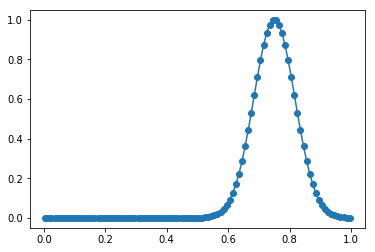

In [9]:
x=domain.grid.x.centers
bet=100; gam=5; x0=0.75
claw.solution.q[0,:] = np.exp(-bet * (x-x0)**2) * np.cos(gam * (x - x0))
claw.solution.q[1,:] = 0.

plt.plot(x, claw.solution.q[0,:],'-o')

The acoustics equations above have some coefficients – namely, the bulk modulus K and density ρ – that must be defined. Furthermore, checking the code for the Riemann solver we’ve chosen reveals that it expects us to provide values for the impedance Z and sound speed c. These values are stored in a Python dictionary called problem_data that is a member of the State.

In [10]:
density = 1.0
bulk_modulus = 1.0
impedance = np.sqrt(density*bulk_modulus)
sound_speed = np.sqrt(density/bulk_modulus)

claw.solution.state.problem_data = {
                              'rho' : density,
                              'bulk': bulk_modulus,
                              'zz'  : np.sqrt(density*bulk_modulus),
                              'cc'  : np.sqrt(bulk_modulus/density)
                              }

Okay, setup complete. Now we can run!

In [11]:
status = claw.run()

2019-06-24 11:38:38,646 INFO CLAW: Solution 0 computed for time t=0.000000
2019-06-24 11:38:38,648 INFO CLAW: Solution 1 computed for time t=0.020000
2019-06-24 11:38:38,649 INFO CLAW: Solution 2 computed for time t=0.040000
2019-06-24 11:38:38,651 INFO CLAW: Solution 3 computed for time t=0.060000
2019-06-24 11:38:38,652 INFO CLAW: Solution 4 computed for time t=0.080000
2019-06-24 11:38:38,654 INFO CLAW: Solution 5 computed for time t=0.100000
2019-06-24 11:38:38,655 INFO CLAW: Solution 6 computed for time t=0.120000
2019-06-24 11:38:38,656 INFO CLAW: Solution 7 computed for time t=0.140000
2019-06-24 11:38:38,658 INFO CLAW: Solution 8 computed for time t=0.160000
2019-06-24 11:38:38,659 INFO CLAW: Solution 9 computed for time t=0.180000
2019-06-24 11:38:38,661 INFO CLAW: Solution 10 computed for time t=0.200000
2019-06-24 11:38:38,663 INFO CLAW: Solution 11 computed for time t=0.220000
2019-06-24 11:38:38,664 INFO CLAW: Solution 12 computed for time t=0.240000
2019-06-24 11:38:38,66

We can plot the solution at any of our output times by specifying the frame:

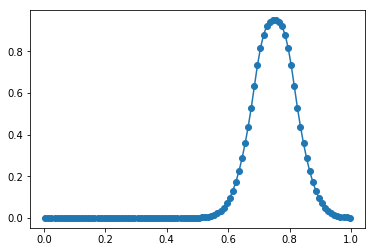

In [13]:
pressure = claw.frames[50].q[0,:]
plt.plot(x,pressure,'-o')

Or, if you prefer, we can watch an animated version.

In [14]:
from matplotlib import animation
from clawpack.visclaw.JSAnimation import IPython_display

2019-06-24 11:40:06,074 INFO CLAW: Animation.save using <class 'clawpack.visclaw.JSAnimation.html_writer.HTMLWriter'>



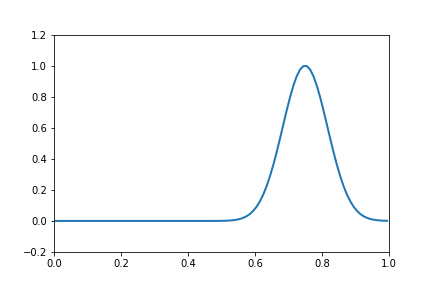
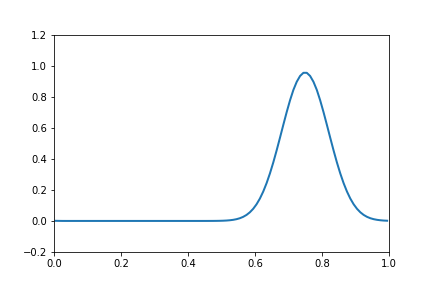
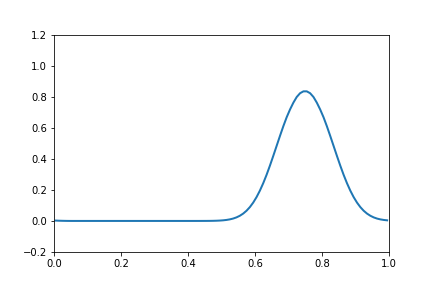
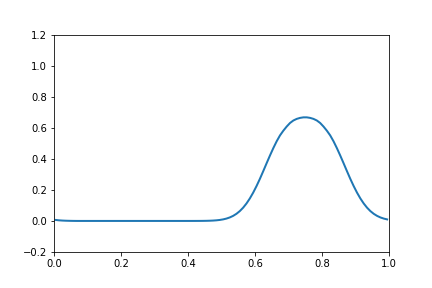
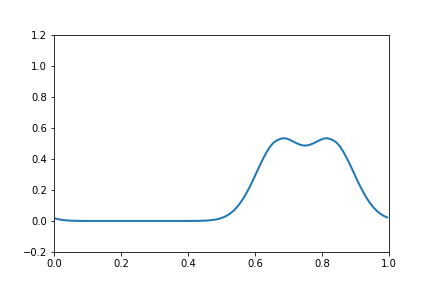
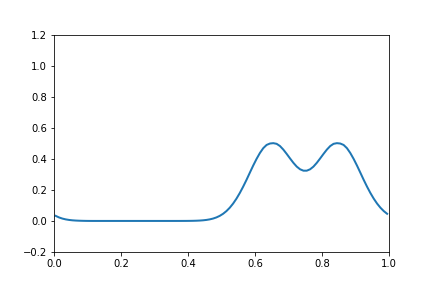
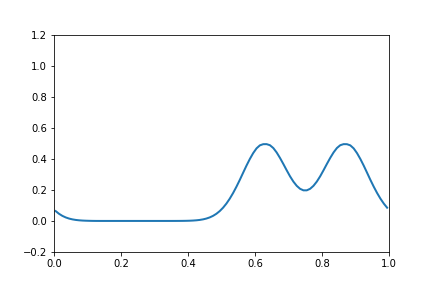
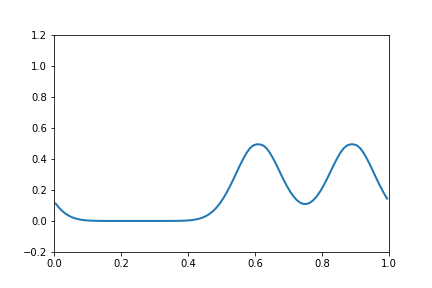
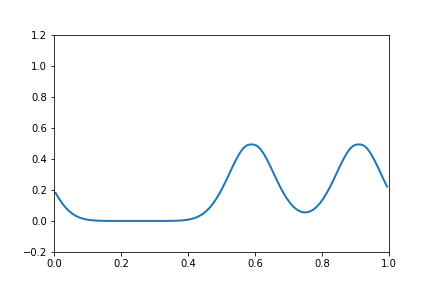
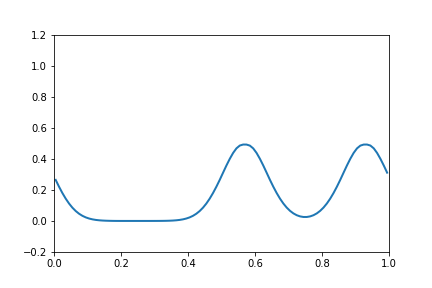
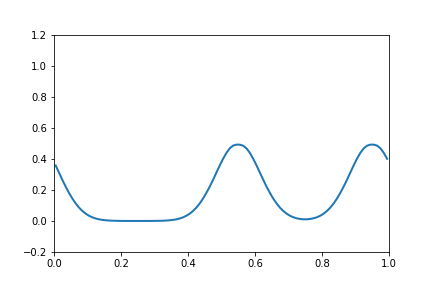
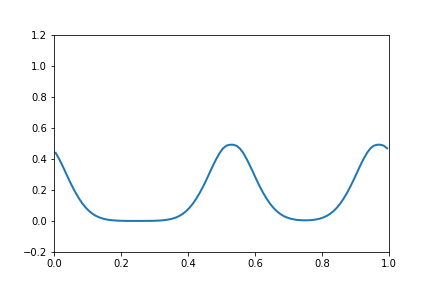
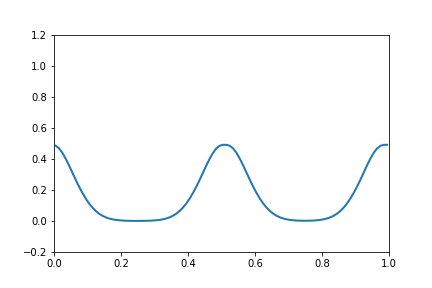
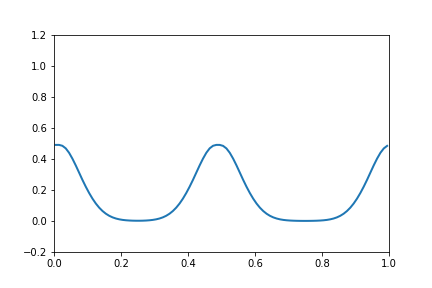
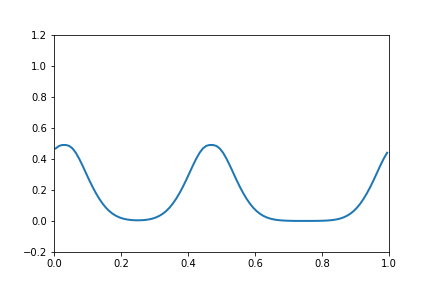
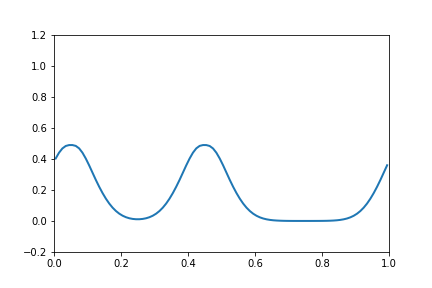
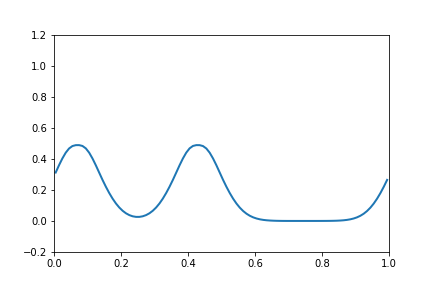
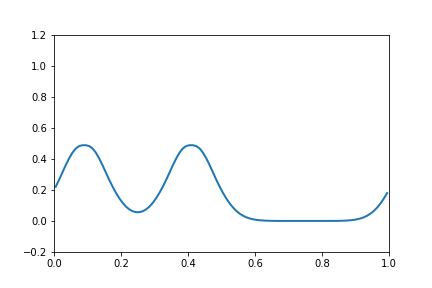
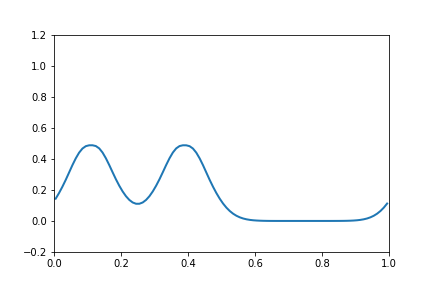
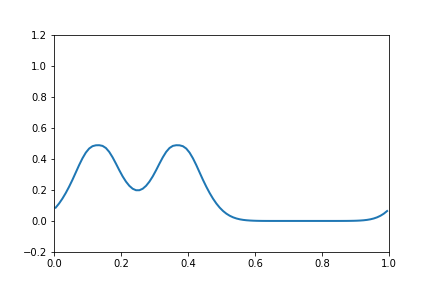
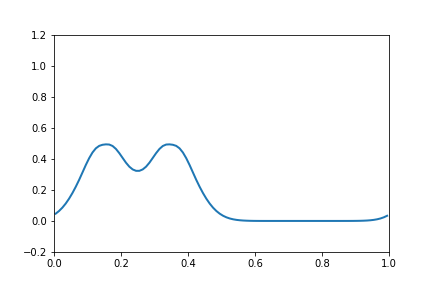
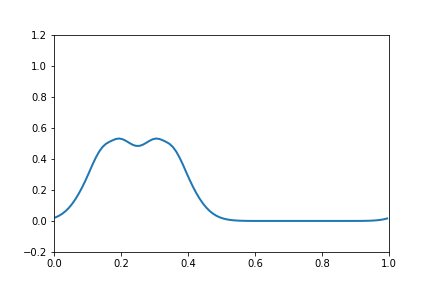
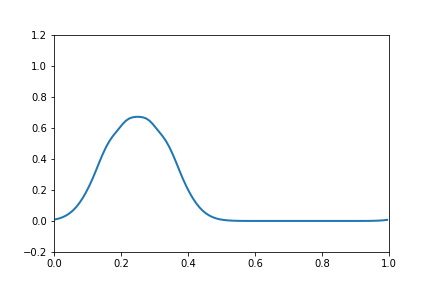
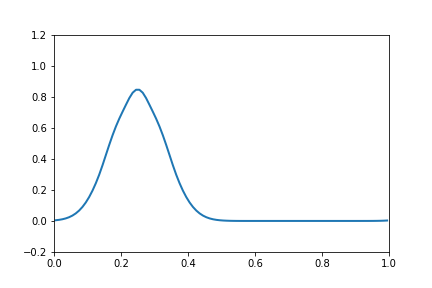
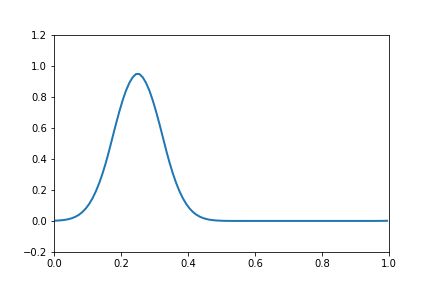
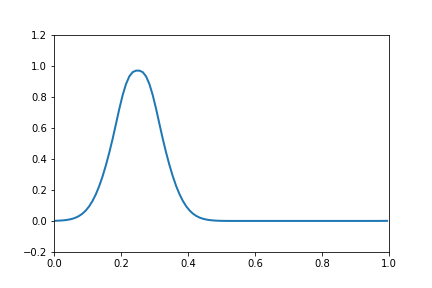
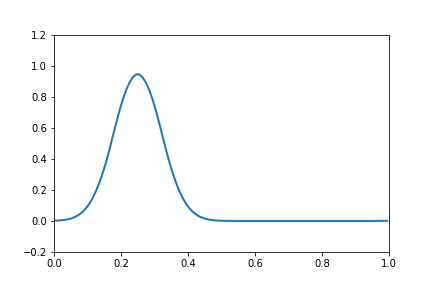
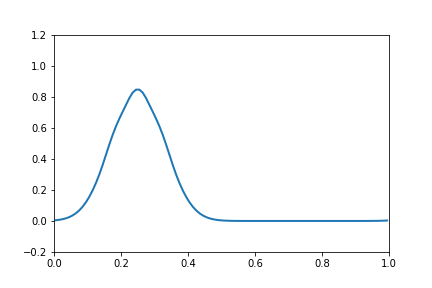
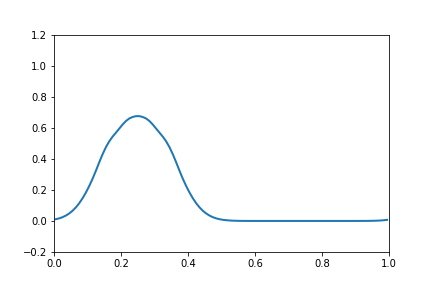
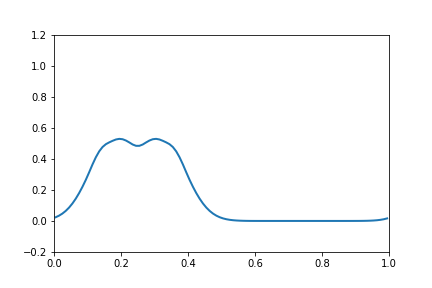
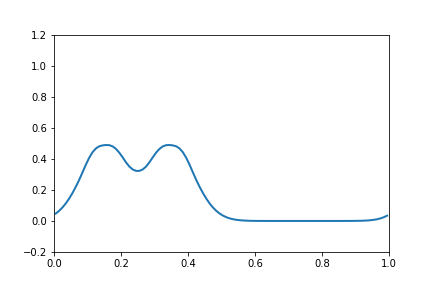
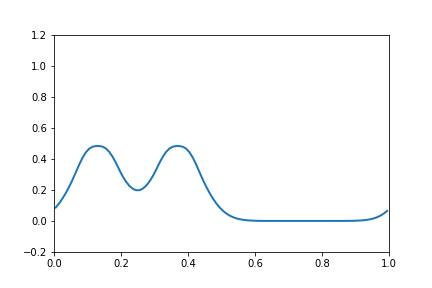
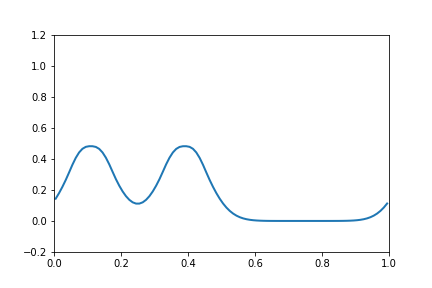
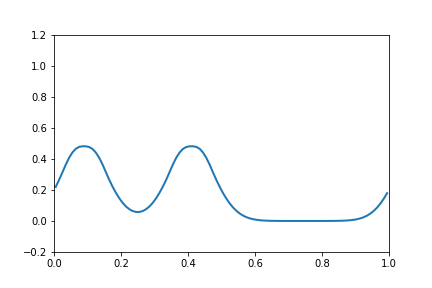
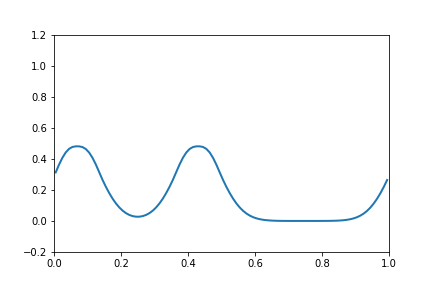
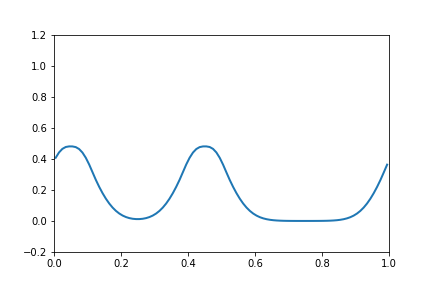
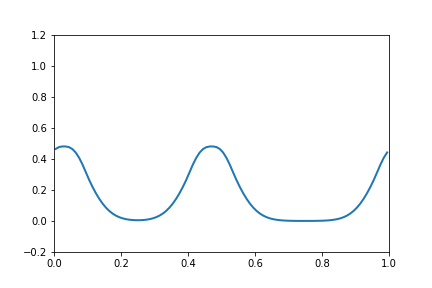
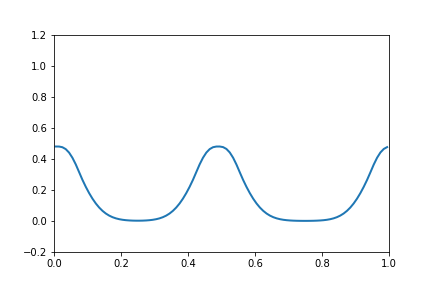
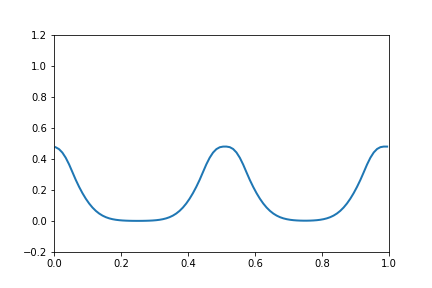
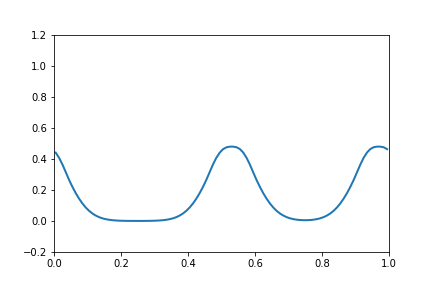
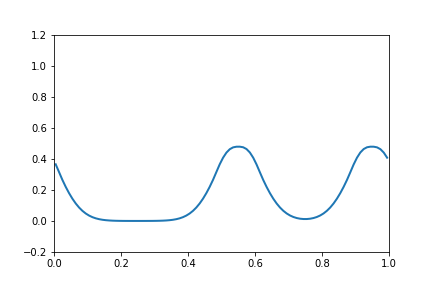
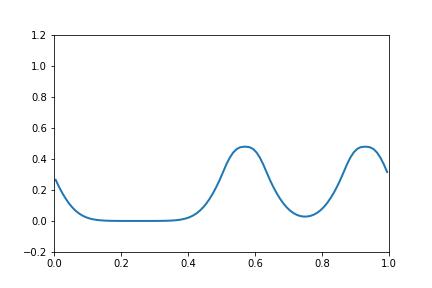
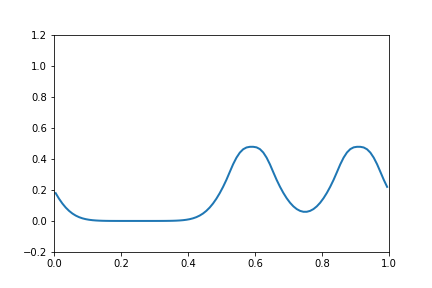
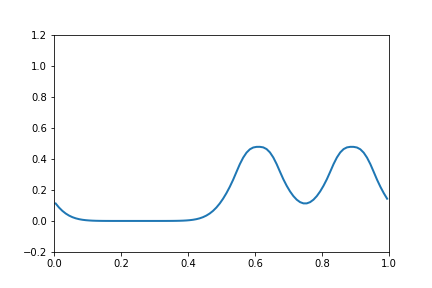
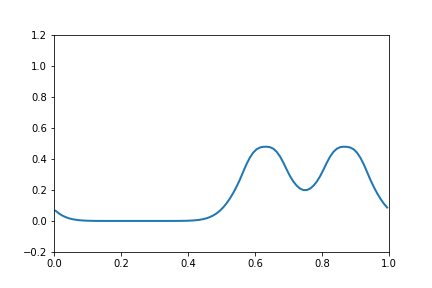
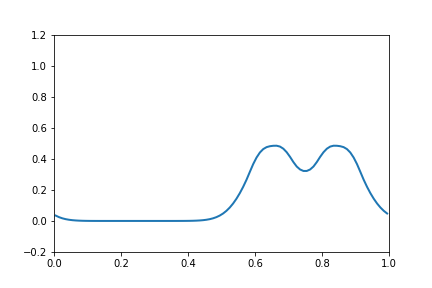
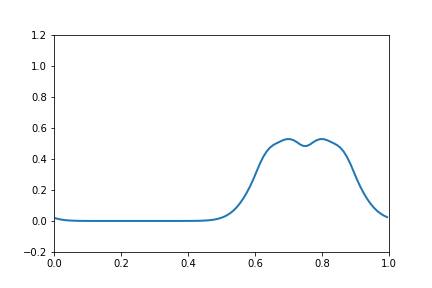
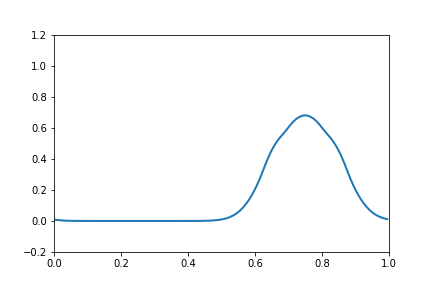
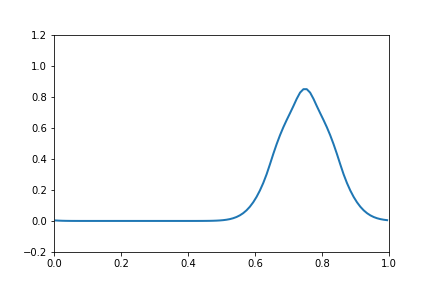
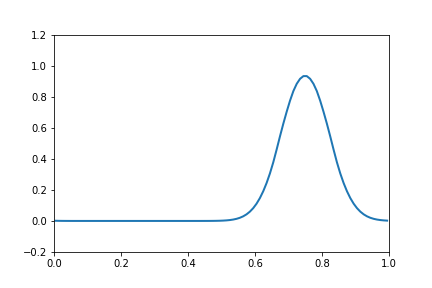
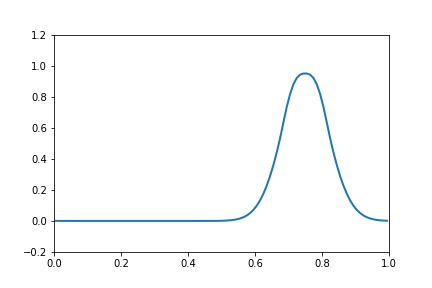

In [15]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-0.2, 1.2))

frame = claw.frames[0]
pressure = frame.q[0,:]
line, = ax.plot([], [], lw=2)

def fplot(frame_number):
    frame = claw.frames[frame_number]
    pressure = frame.q[0,:]
    line.set_data(x,pressure)
    return line,

animation.FuncAnimation(fig, fplot, frames=len(claw.frames), interval=30)